In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 16
from scipy import fftpack
from scipy.ndimage import gaussian_filter
from scipy import signal
import scipy
import warnings
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')

In [2]:
dfi_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfi_O2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/Initial/O2/Run1.txt', delimiter=' ' , dtype= np.float64)
dfi_O1 = dfi_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfi_O2 = pd.concat([dfi_O2['Delays'], dfi_O2['Time-delay1']], axis=1)
dfi = dfi_O2.rename(columns={"Time-delay1": "O2"}, errors="raise")
dfi = pd.concat([dfi['Delays'], dfi_O1['O1'], dfi['O2']], axis=1)

In [3]:
dfit1_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit1_O2_run1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O2/Run1.txt', delimiter=' ' , 
                           dtype= np.float64)
dfit1_O2_run2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it1/O2/Run2.txt', delimiter=' ' , 
                           dtype= np.float64)
dfit1_O1 = dfit1_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit1_O1 = pd.concat([dfit1_O1['Delays'], dfit1_O1['O1']], axis=1)
dfit1_O2_run1 = dfit1_O2_run1.rename(columns={"Time-delay1": "O2 (Run 1)"}, errors="raise")
dfit1_O2_run2 = dfit1_O2_run2.rename(columns={"Time-delay1": "O2 (Run 2)"}, errors="raise")
dfit1_O2 = pd.concat([dfit1_O2_run2['Delays'], dfit1_O2_run1['O2 (Run 1)'], dfit1_O2_run2['O2 (Run 2)']], axis=1)

In [4]:
dfit2_O1 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it2/O1/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit2_O1 = dfit2_O1.rename(columns={"Time-delay1": "O1"}, errors="raise")
dfit2_O1 = pd.concat([dfit2_O1['Delays'], dfit2_O1['O1']], axis=1)

In [5]:
dfit2_O2 = pd.read_csv('c:/Users/Jacob/Nonlinearity/Data/NS5/salt-freeze/it2/O2/Run1.txt', delimiter=' ' , dtype= np.float64)
dfit2_O2 = dfit2_O2.rename(columns={"Time-delay1": "O2"}, errors="raise")
dfit2_O2 = pd.concat([dfit1_O2_run2['Delays'], dfit2_O2['O2']], axis=1)

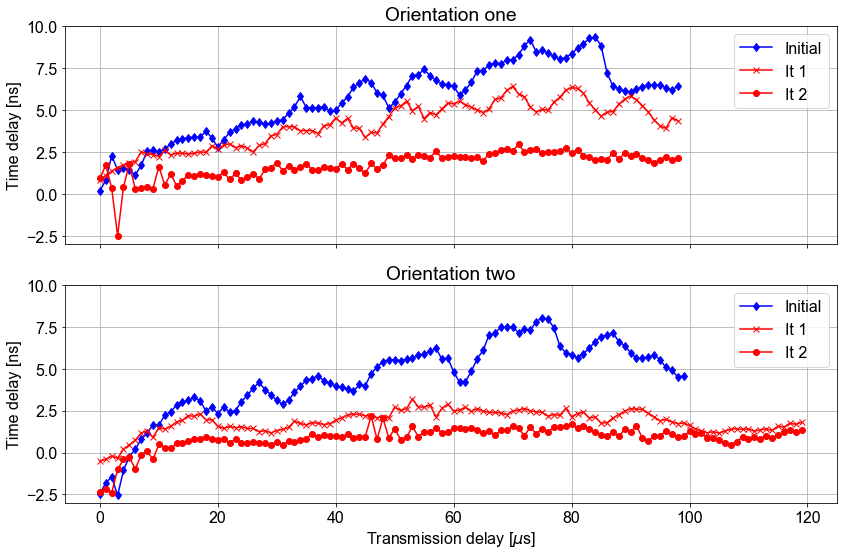

In [12]:
fig, ax = plt.subplots(2, 1, figsize =(12, 8), sharex = True)
ax[0].plot(dfi['Delays'], dfi['O1'], '-d', color = 'b', label='Initial')
ax[0].plot(dfit1_O1['Delays'], dfit1_O1['O1'], '-x', color = 'r', label='It 1')
ax[0].plot(dfit2_O1['Delays'], dfit2_O1['O1'], '-o', color = 'r', label='It 2')

ax[1].plot(dfi['Delays'], dfi['O2'],'-d', color = 'b', label='Initial')
# [ax[1].plot(dfit1_O2['Delays'], dfit1_O2[i], label=i) for i in dfit1_O2.keys()[1:]]
ax[1].plot(dfit1_O2['Delays'], dfit1_O2['O2 (Run 1)'], '-x', color = 'r', label='It 1')
ax[1].plot(dfit2_O2['Delays'], dfit2_O2['O2'], '-o', color = 'r', label='It 2')
ax[1].legend()
[ax[i].set_ylabel('Time delay [ns]') for i in range(2)]
[ax[i].set_ylim(-3.0, 10.0) for i in range(2)]
[ax[i].grid() for i in range(2)]
[ax[i].legend() for i in range(2)]
ax[1].set_xlabel('Transmission delay [$\mu$s]')
ax[0].set_title('Orientation one')
ax[1].set_title('Orientation two')
plt.tight_layout()
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/NS/Salt-freeze2Dplot.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

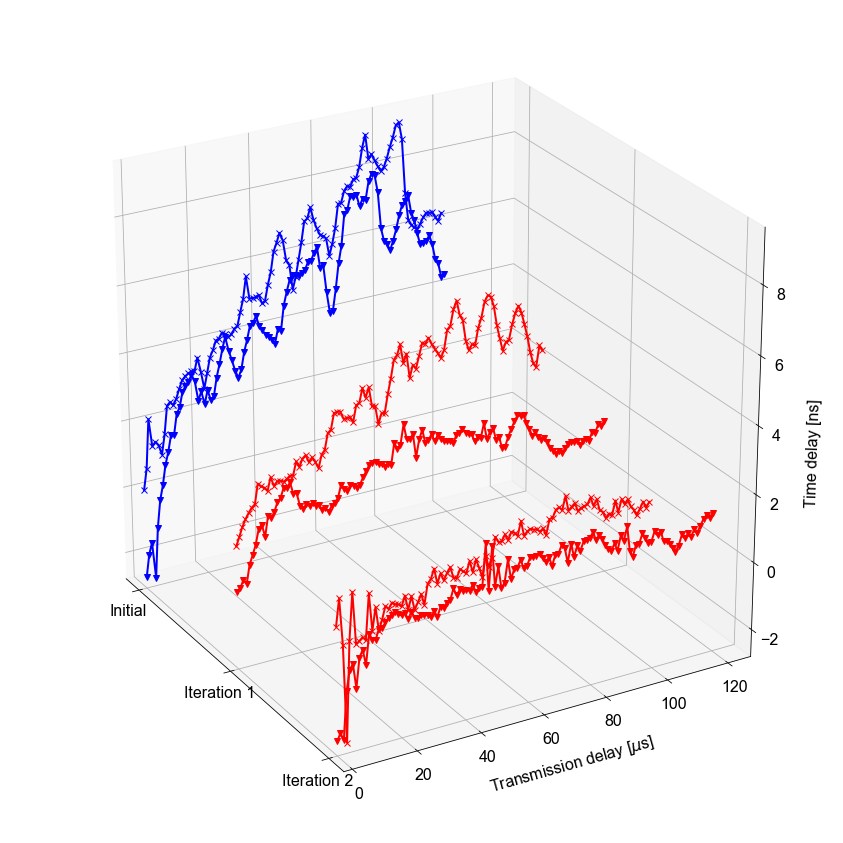

In [11]:
x = np.arange(0,3,1)
xx, yy = np.meshgrid(range(3), range(100)) 
fig = plt.figure(figsize=(12,12,))
ax = fig.add_subplot(111, projection='3d')
ax.set_ylabel('Transmission delay [$\mu$s]', fontsize=16, labelpad=15)
ax.set_zlabel('Time delay [ns]', fontsize=16, labelpad=15)
ax.set_ylim(0,125)
ax.plot(dfi['Delays'], dfi['O1'], 0, '-x', zdir='x', color='b', linewidth=2)
ax.plot(dfit1_O1['Delays'], dfit1_O1['O1'], 1, '-x', zdir='x', color='r', linewidth=2)
ax.plot(dfit2_O1['Delays'], dfit2_O1['O1'], 2, '-x', zdir='x', color='r', linewidth=2)

ax.plot(dfi['Delays'], dfi['O2'], 0, '-v', zdir='x', color='b', linewidth=2)
ax.plot(dfit1_O2['Delays'], dfit1_O2['O2 (Run 1)'], 1, '-v', zdir='x', color='r', linewidth=2)
ax.plot(dfit2_O2['Delays'], dfit2_O2['O2'], 2, '-v', zdir='x', color='r', linewidth=2)


ax.set_xticks(np.arange(0, 3, 1))
ax.set_xticklabels(['Initial', 'Iteration 1', 'Iteration 2'])
ax.view_init(25, 330)
# ax.plot_surface(xx, yy, np.zeros_like(xx), alpha=0.25)
plt.tight_layout()
# plt.savefig('c:/users/Jacob/Nonlinearity/Images/Final_results/Salt-freeze3Dplot.pdf', dpi=300, bbox_inches='tight',
#            format='pdf')
plt.show()

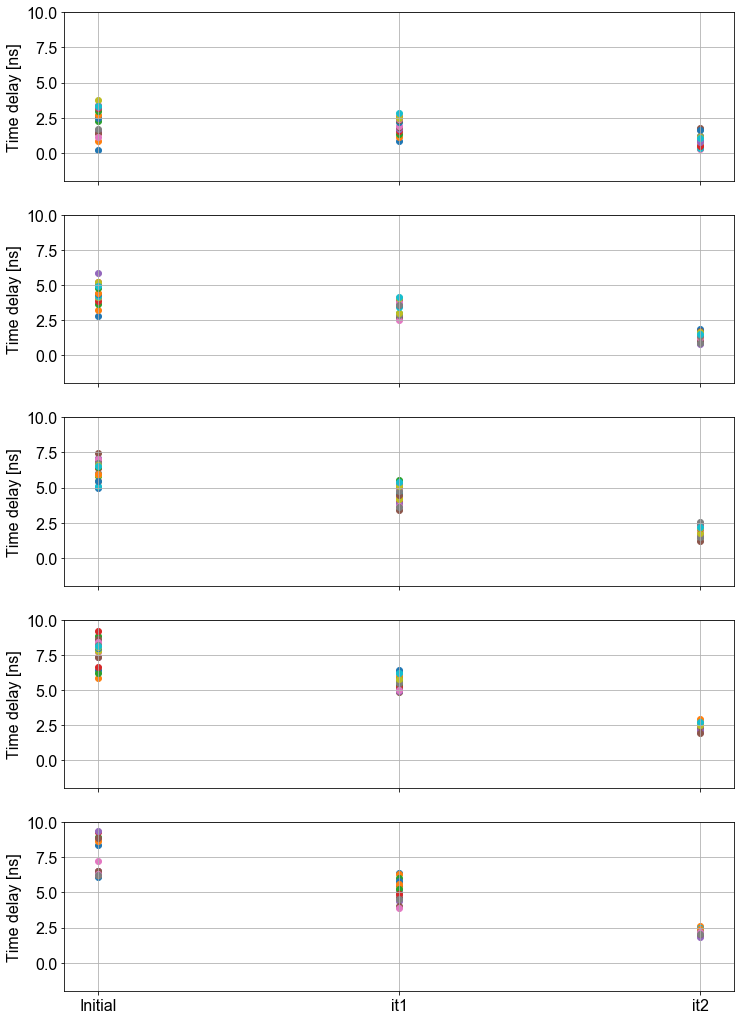

In [63]:
fig, ax =  plt.subplots(5, 1, figsize=(12, 18), sharex = True)
x = np.arange(0,3,1)
for j in range(5):
    if (j+1)*20 < 98:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:(j+1)*20]]
    else:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:98]]

[ax[i].grid() for i in range(5)]
[ax[i].set_ylabel('Time delay [ns]') for i in range(5)]
[ax[i].set_ylim(-2.0, 10) for i in range(5)]
ax[4].set_xticks(np.arange(0, 3, 1))
ax[4].set_xticklabels(['Initial', 'it1', 'it2'])

plt.show()

In [42]:
def parabola(x, a, b, c):
    return a*x**2+b*x+c

In [59]:
pars=[]
covs=[]
for i in range(99):
    par, cov = curve_fit(f=parabola, xdata=x, ydata=[dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]], 
                         p0=[0, 0, 0], bounds=(-np.inf, np.inf))
    pars.append(par)
    covs.append(cov)

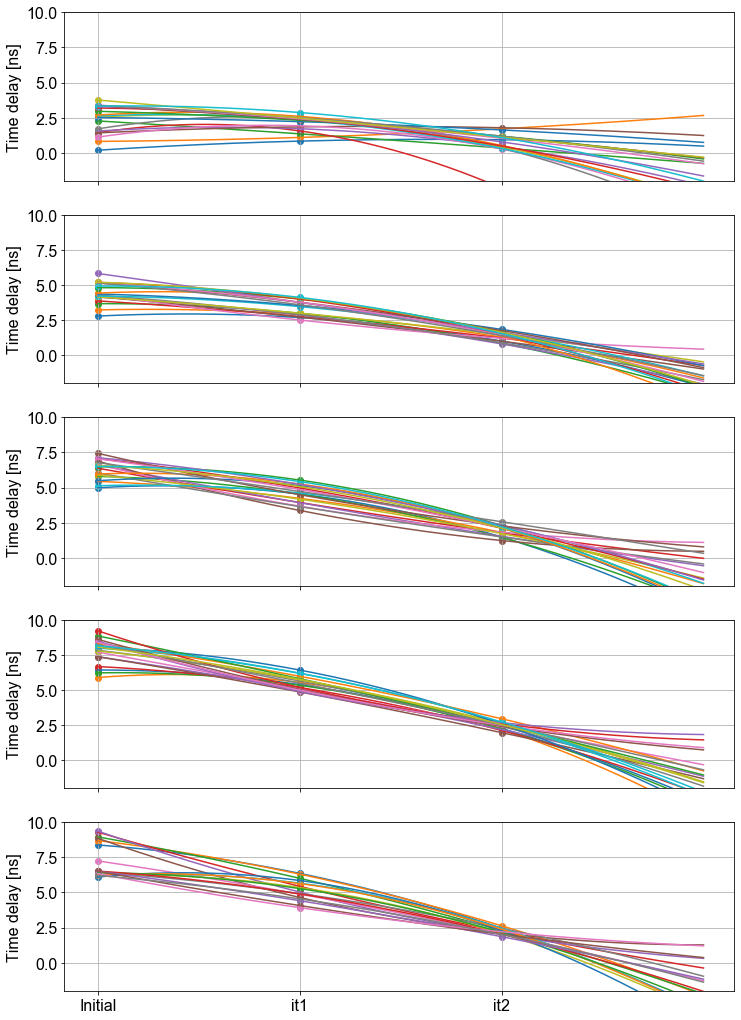

In [66]:
fig, ax =  plt.subplots(5, 1, figsize=(12, 18), sharex = True)
xx = np.linspace(0,3,1000)

for j in range(5):
    if (j+1)*20 < 98:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:(j+1)*20]]
        [ax[j].plot(xx, parabola(xx, p[0], p[1], p[2])) for p in pars[j*20:(j+1)*20]]
    else:
        [ax[j].scatter(x, [dfi['O1'][i], dfit1_O1['O1'][i], dfit2_O1['O1'][i]]) for i in dfi['Delays'][j*20:98]]
        [ax[j].plot(xx, parabola(xx, p[0], p[1], p[2])) for p in pars[j*20:98]]

[ax[i].grid() for i in range(5)]
[ax[i].set_ylabel('Time delay [ns]') for i in range(5)]
[ax[i].set_ylim(-2.0, 10) for i in range(5)]
ax[4].set_xticks(np.arange(0, 3, 1))
ax[4].set_xticklabels(['Initial', 'it1', 'it2'])

plt.show()

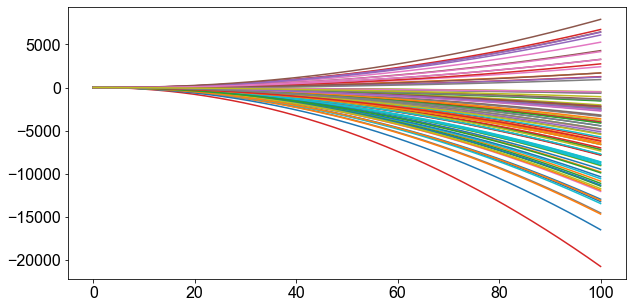

In [70]:
plt.figure(figsize = (10, 5))
xxx = np.linspace(0, 100, 10000)
[plt.plot(xxx, parabola(xxx, p[0], p[1], p[2])) for p in pars]
plt.show()